<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Supervised-classification" data-toc-modified-id="Supervised-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Supervised classification</a></span></li></ul></div>

# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
# Your code here
df=pd.read_csv('data_all.csv', nrows=75000)

In [22]:
df.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data=df.values 
print ('Dimensiones matriz de datos: {}'.format(data.shape))

Dimensiones matriz de datos: (75000, 785)


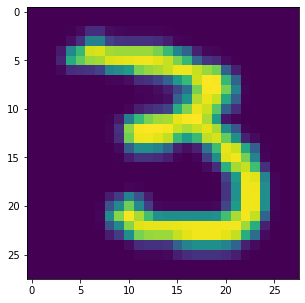

In [24]:
plt.figure(figsize=(5,5))
plt.imshow(data[2,1:].reshape(28,28))  
plt.show()

In [19]:
alfabeto={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',
          10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J',
          20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
          30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z',
          36:'a', 37:'b', 38:'c', 39:'d', 40:'e', 41:'f', 42:'g', 43:'h', 44:'i', 45:'j',
          46:'k', 47:'l', 48:'m', 49:'n', 50:'o', 51:'p', 52:'q', 53:'r', 54:'s', 55:'t',
          56:'u', 57:'v', 58:'w', 59:'x', 60:'y', 61:'z'}

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [25]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler # normalizadores

# from sklearn.decomposition import PCA

# pca=PCA()

# pca.fit(df)
from sklearn.metrics import r2_score, mean_squared_error 

In [33]:
upper = np.array(df.loc[(df.e>=10)&(df.e<36)])
X = upper[:,1:]/255
y = upper[:,0]


In [34]:
# First of all let's prepare the data, we are going to create a new column in the dataframe, in it we are going to write 0 if not upper and 1 in any other case, 

#pca = PCA()
#pca.fit(y)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=42)


In [35]:
reg = LogisticRegression()
RFC = RandomForestClassifier()
SVC_ = SVC()

In [36]:
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)


/home/pomilusky/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
r2_score(y_test, y_pred) # Total Failure

0.5815263219335132

In [38]:
RFC.fit(X_train, y_train)
y_pred=RFC.predict(X_test)
r2_score(y_test, y_pred) # Not very good results but not such a bad results as before

0.7673479736762306

In [40]:
SVC_.fit(X_train, y_train)
y_pred=SVC_.predict(X_test)
r2_score(y_test, y_pred)

0.8498230538276563

In [42]:
def all_Models(X,y): 
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=3)
    RFC.fit(X_train, y_train)
    y_pred=RFC.predict(X_test)
    rfc = r2_score(y_test, y_pred) 
    SVC_.fit(X_train, y_train)
    y_pred=SVC_.predict(X_test)
    svc = r2_score(y_test, y_pred)
    reg.fit(X_train, y_train)
    y_pred=reg.predict(X_test)
    LR = r2_score(y_test, y_pred)
    return LR, rfc, svc

* Try to do the same thing with lowercases.

In [43]:
# Your code here
lower = np.array(df.loc[df.e>36])
X = lower[:,1:]/255
y = lower[:,0]
#pca = PCA()
#pca.fit(y)
all_Models(X,y)


/home/pomilusky/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.599890257334639, 0.7900205219466725, 0.8459626854679455)

* Try to do the same thing with numbers.

In [45]:
number = np.array(df.loc[(df.e<10)])
X = number[:,1:]/255
y = number[:,0]
#pca = PCA()
#pca.fit(y)
all_Models(X,y)
